# Detectron Mask R-CNN Demo

This is a [Mask R-CNN](https://arxiv.org/abs/1703.06870) colab notebook using [facebookresearch/Detectron](https://github.com/facebookresearch/Detectron).


For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install Detectron

In [3]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/facebookresearch/Detectron.git'

In [6]:
project_name = splitext(basename(git_repo_url))[0]
# project_name = 'Detectron'
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # dependencies
  !cd $project_name && pip install -q -r requirements.txt
  # build
  !cd $project_name && make
# test Detectron
!python $project_name/detectron/tests/test_spatial_narrow_as_op.py 

Traceback (most recent call last):
  File "Detectron/detectron/tests/test_spatial_narrow_as_op.py", line 29, in <module>
    import detectron.utils.c2 as c2_utils
ModuleNotFoundError: No module named 'detectron'


In [ ]:
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
# plt.rcParams["axes.grid"] = True

from IPython.display import clear_output

## Evaluate on a test image

First, download a test image from the internet:

In [ ]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg'

In [ ]:
image_file = basename(IMAGE_URL)
image_file
splitext(image_file)

('traffic_camera', '.jpg')

In [ ]:
image_file_ext = splitext(image_file)[1][1:]

In [ ]:
images_dir = 'images'

In [ ]:
!mkdir -p $images_dir 

In [ ]:
!rm -rf $images_dir/*

In [ ]:
!pwd

/content/Detectron


In [ ]:
!wget -q -O $images_dir/$image_file $IMAGE_URL

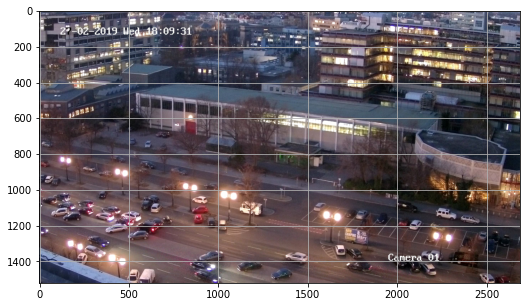

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(matplotlib.image.imread(join(images_dir, image_file)))

According to [Detectron/MODEL_ZOO.md](https://github.com/facebookresearch/Detectron/blob/master/MODEL_ZOO.md#end-to-end-faster--mask-r-cnn-baselines), the Mask R-CNN model `X-101-64x4d-FPN` has Box mAP 42.4 and Mask mAP 37.5 on the COCO dataset. We will use this model and evaluate on the above downloaded image:

In [ ]:
MODEL_CFG = 'e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'
# X-152-32x8d-FPN-IN5k -> OUT OF MEMORY ON COLAB!
# MODEL_CFG = 'e2e_mask_rcnn_X-152-32x8d-FPN-IN5k_1.44x.yaml'
# PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/37129812/12_2017_baselines/e2e_mask_rcnn_X-152-32x8d-FPN-IN5k_1.44x.yaml.09_35_36.8pzTQKYK/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name


In [ ]:
! pwd
# !cd Detectron
# %pwd

/content/Detectron


In [ ]:
s = project_name
s

'Detectron'

In [ ]:
!python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:44] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:44] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:44] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwV

Now visualize the result:

In [ ]:
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/%s.png' % image_file))

FileNotFoundError: ignored

<Figure size 3600x3600 with 0 Axes>